<a href="https://colab.research.google.com/github/ajayrfhp/LearningDeepLearning/blob/main/d2l_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Why is batch/minibatch SGD better than SGD ?
  - SGD uses one sample to do gradient update. Processors are generally faster at doing multiplying/adds than reading stuff from memory.
  - Batch allows us to smooth out noise, useful for algorithms like batch norm.

### Does batchsize need to be a multiplier of 2 ?
Main arguments are memory alignment and floating point efficiency.
- Memory alignment
  - Computer architectures are organized in powers of 2.
- FLoating point efficiency
  - To multiply a matrix of size $M*K$ with $K*N$, it will require $2*M*N*K$ flops.
  - NVIDIA's user guide claims matrix multiplications are faster if batch sizes are multiples of 8
- In practise the difference may be negligible https://sebastianraschka.com/blog/2022/batch-size-2.html. A batch size of 500 may be just as good as 512



### Vectorization benchmark
- Why is vectorization faster ?
  - Low level linear algebra libarries are used to do the computation

In [15]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successful

In [14]:
import torch
import time
import d2l.torch as d2l
import torch.nn as nn
import numpy as np

In [1]:

n = 100000

a = torch.ones(n)
b = torch.ones(n)

c = torch.zeros(n)

start = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
end = time.time()
print("Time with loop", end - start)

start = time.time()
d = a + b
end = time.time()
print("Time with vectorization", end - start)


Time with loop 1.380516767501831
Time with vectorization 0.0007719993591308594


### Minimizing $\sum_{i}{(X_{i}-b) ^ 2}$
- b = sample mean minimizes this. Can be proved by differentiating.

### Minimizing $\sum_{i}{|X_{i}-b|}$
- b = sample median minimizes this. Tricky to prove.
- AI generated below code to demonstrate intuition behind the idea. Median is defined as point that has 50% of data to the right and left. If you move either side of median, the sum will increase

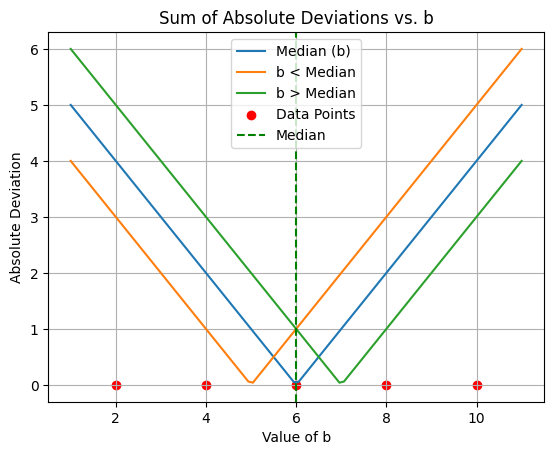

In [10]:
### Gemini generated code

import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = [2, 4, 6, 8, 10]

# Calculate the median
median = np.median(data)

# Define the absolute deviation function (piecewise for visualization)
def abs_dev(x, b):
    return np.abs(x-b)

# Generate x-axis values for the plot
x = np.linspace(min(data) - 1, max(data) + 1, 100)

# Calculate absolute deviations for different b values
y_med = abs_dev(x, median)
y_less = abs_dev(x, median - 1)
y_more = abs_dev(x, median + 1)

# Plot the data points, median line, and absolute deviation functions
plt.plot(x, y_med, label='Median (b)')
plt.plot(x, y_less, label='b < Median')
plt.plot(x, y_more, label='b > Median')
plt.scatter(data, [0 for _ in data], marker='o', color='red', label='Data Points')
plt.axvline(x=median, color='green', linestyle='--', label='Median')

# Set labels and title
plt.xlabel('Value of b')
plt.ylabel('Absolute Deviation')
plt.title('Sum of Absolute Deviations vs. b')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [7]:
y_more.sum(), y_less.sum(), y_med.sum()

(262.42424242424244, 262.42424242424244, 252.52525252525254)

### How to split across multiple jupyter cell blocks ?
- Register function to class after creation of a class

In [12]:
def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [13]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [14]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


### Save all parameters in init as class attributes

In [3]:
class B(d2l.HyperParameters):
  def __init__(self, w1, b1, w2, b2):
    self.save_hyperparameters()

b = B(1, 2, 3, 4)
print(b.w1)

1


### Progress board tracker

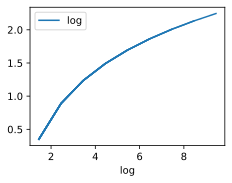

In [9]:
board = d2l.ProgressBoard('log')
for x in np.arange(0, 10, 0.1):
  board.draw(x, np.log(x), 'log', every_n=10)

### Model module
- Model module will contain learnable parameters, loss functions, optimizers.

In [15]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### Data Module
- Data module is used to convert raw dataset into pytorch loaders for training

In [16]:
class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### Trainer module
- Trainer module trains learnable parameters in module class with data module. Trainer model has fit method which has model and data.

### Synthetic linear regression

In [17]:
class SyntheticRegression(d2l.DataModule):
  def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32):
    super().__init__()
    self.save_hyperparameters()
    n = num_train + num_val
    self.X = torch.randn(n, len(w))
    noise = torch.randn(n, 1) * noise
    self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [ ]:
@d2l.add_to_class(SyntheticRegression)
def get_dataloader(self, train):
  if train:
    indices = list(range(0, self.num_train))
    # the examples are read in random order
    np.random.shuffle(indices)
  else:
    indices = list(range(self.num_train, self.num_train+self.num_val))


  for i in range(0, len(self.X), self.batch_size):
    batch_indices = indices[i: i + self.batch_size]
    yield self.X[batch_indices], self.y[batch_indices]
